## Preprocessing Notebook
---

This notebook is used to preprocess the data before training the model. Since we are dealing with RAW audio, the preprocessing steps are as follows:
1. [Set the paths](#set-the-paths)
2. [Check the presence of corrupted files](#check-the-presence-of-corrupted-files)
3. [Structure the data in a proper way to standardize feature extraction](#structure-the-data)
4. [Resample the audio files to a common sampling rate (if needed)](#resample-the-audio-files)

In [1]:
# needed packages
#%pip install tqdm torch torchaudio ipywidgets shutils

# import all the functions
from utils import *
import pandas as pd
import shutil
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%%html
<style>
.cell-output-ipywidget-background {
    background-color: transparent !important;
}
:root {
    --jp-widgets-color: var(--vscode-editor-foreground);
    --jp-widgets-font-size: var(--vscode-editor-font-size);
}  
</style>

# -------- tqdm DARK THEME --------

### 1. Set the paths

In [3]:
# hyperparameters
sr = 4000
#sr = ''

# set the paths
BASE_DIR = '../dataset/'
FULL_DATA_DIR = BASE_DIR + 'audio/'
CORRUPTED_DIR = BASE_DIR + f'audio/corrupted_{sr}/'
METADATA = BASE_DIR + 'metadata.csv'
ANNOTATION = BASE_DIR + 'annotation.csv'
LABELS = BASE_DIR + 'labels.csv'

# paths of restrucutred data
ARTIFACTS_DIR = BASE_DIR + f'artifacts_{sr}/'
EXTRAHLS_DIR = BASE_DIR + f'extrahls_{sr}/'
MURMURS_DIR = BASE_DIR + f'murmurs_{sr}/'
NORMALS_DIR = BASE_DIR + f'normals_{sr}/'
EXTRASTOLES_DIR = BASE_DIR + f'extrastoles_{sr}/'

DIRS = [ARTIFACTS_DIR, EXTRAHLS_DIR, MURMURS_DIR, NORMALS_DIR, EXTRASTOLES_DIR]

### 2. Check the presence of corrupted files

In [4]:
count, names = move_corrupted_files(FULL_DATA_DIR, CORRUPTED_DIR)

Checking files:   0%|          | 0/663 [00:00<?, ?it/s]

File corrupted is corrupted
File corrupted_4000 is corrupted


mv: rename ../dataset/audio/corrupted_4000 to ../dataset/audio/corrupted_4000/corrupted_4000: Invalid argument


Files corrupted in ../dataset/audio/:	2



### 3. Structure the data

In [5]:
metadata = pd.read_csv(METADATA)
annotation = pd.read_csv(ANNOTATION)
labels = pd.read_csv(LABELS)
audio_info= pd.merge(metadata, labels, on='filename')

unique_labels = pd.unique(labels['label'])
print(unique_labels)


['artifact' 'extrahls' 'murmur' 'normal' 'extrastole']


In [6]:
# create a directory for each label and copy the files
for i, label in enumerate(unique_labels):
    audio_info_filt = audio_info[audio_info['label'] == label]['filename']
    names_list = audio_info_filt.to_list()
    
    # create the directories
    os.makedirs(DIRS[i], exist_ok=True)
    
    # copy the files
    for name in names_list:
        shutil.copy(FULL_DATA_DIR + name, DIRS[i] + name)
    

### 4. Resample the audio files

In [7]:
for DIR in DIRS:
	check_resample_sample_rate(target_freq=sr, src_dir=DIR, overwrite=True)

  0%|          | 0/92 [00:00<?, ?it/s]

Resampling artifact_2023_17.wav from 48000 Hz to 4000 Hz...
Completed.
Resampling artifact__201012172012.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling artifact__201105280851.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling artifact__201106010559.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling artifact_2023_16.wav from 48000 Hz to 4000 Hz...
Completed.
Resampling artifact_2023_14.wav from 48000 Hz to 4000 Hz...
Completed.
Resampling artifact_2023_28.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling artifact__201105061143.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling artifact__201106141701.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling artifact__201106070537.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling artifact__201106161016.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling artifact_2023_29.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling artifact_2023_15.wav from 48000 Hz to 4000 Hz...
Completed.
Resampling artifact_2023_39.wav fro

  0%|          | 0/19 [00:00<?, ?it/s]

Resampling extrahls__201104140118.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling extrahls__201103170134.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling extrahls__201104270458.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling extrahls__201104270459.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling extrahls__201101160808.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling extrahls__201101070953.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling extrahls__201102071835.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling extrahls__201104021355.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling extrahls__201101161027.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling extrahls__201103200218.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling extrahls__201102070251.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling extrahls__201101241423.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling extrahls__201102241217.wav from 44100 Hz to 4000 Hz...
Completed.

  0%|          | 0/149 [00:00<?, ?it/s]

Resampling murmur__201108222256.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling murmur__201108222242.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling murmur__201108222243.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling murmur__201104021355.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling murmur__201108222255.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling murmur__201108222251.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling murmur__201108222245.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling abnormal_s4_2023_2.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling murmur__201101051108.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling early_systolic_murmur_2023_12.wav from 11025 Hz to 4000 Hz...
Completed.
Resampling murmur__201108222253.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling murmur__201108222246.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling murmur__201108222252.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling murmur_

  0%|          | 0/355 [00:00<?, ?it/s]

Resampling normal__201108011112.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling normal__201104122156.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling normal__201103090635.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling normal__201108011114.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling normal__201106111136.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling normal__201108011115.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling normal__201105151450.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling normal__201103151912.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling normal__201103140822.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling normal__201106141148.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling normal__201102201230.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling normal__201104141251.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling normal__201102270940.wav from 44100 Hz to 4000 Hz...
Completed.
Resampling normal__201106

  0%|          | 0/46 [00:00<?, ?it/s]

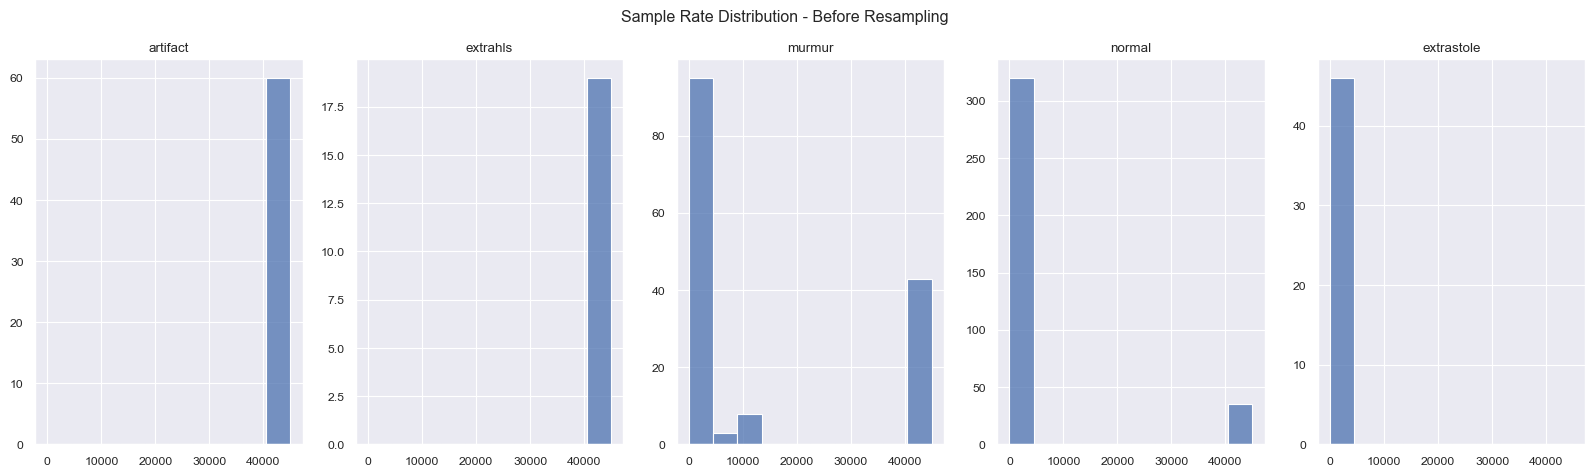

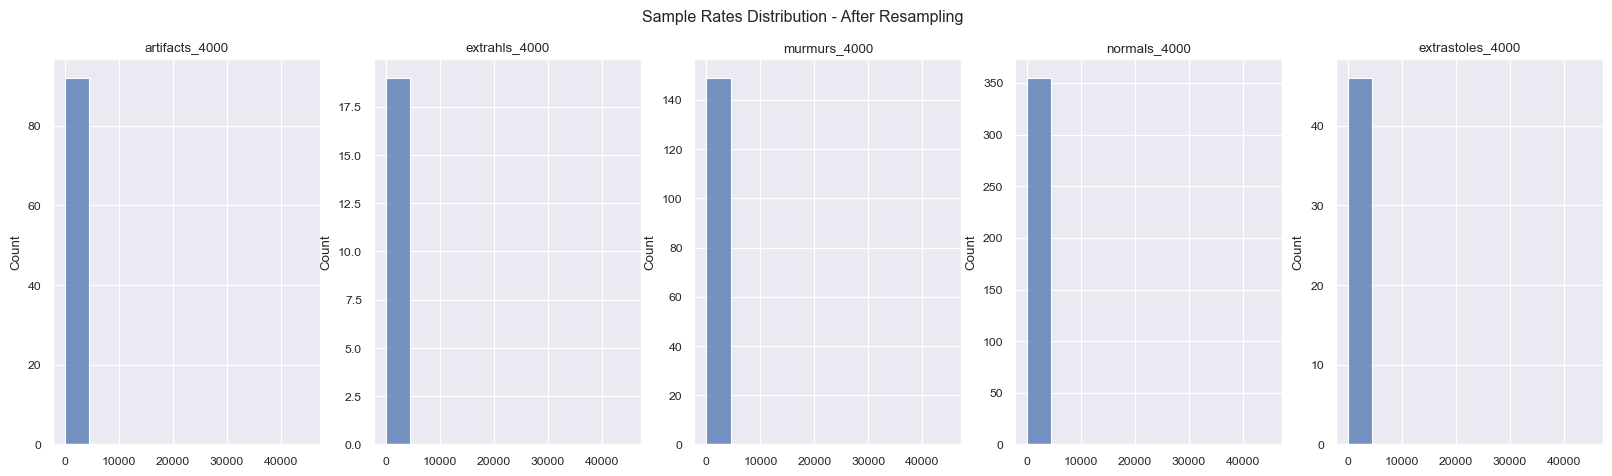

In [16]:
# check the sample rate distribution for each class

unique_labels = audio_info['label'].unique()
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
sns.set_theme(context="paper", font_scale=1)
for i, label in enumerate(unique_labels):
     audio_info_tmp = audio_info[audio_info['label'] == label]
     sns.histplot(audio_info_tmp['sample_rate'], ax = axs[i], bins=10, binrange=(0, 45000))
     axs[i].set_title(label)
     axs[i].set_xlabel('')
     axs[i].set_ylabel('')
     fig.suptitle('Sample Rate Distribution - Before Resampling')
     

# check the sample rates distribution
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
for DIR in DIRS:
	srs = []
	files = os.listdir(DIR)
	for file in files:
		meta = torchaudio.info(DIR + file)
		srs.append(meta.sample_rate)
	sns.histplot(srs, ax=axs[DIRS.index(DIR)], bins=10, binrange=(0, 45000))
	axs[DIRS.index(DIR)].set_title(DIR.split('/')[-2])
fig.suptitle('Sample Rates Distribution - After Resampling')
plt.show()